# Numerical Methods 


## Numerical Differentiation


### Exercise solutions

In [1]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## <span style="color:blue">Exercise 1: Compute first derivative using forward differencing</span>

Use the forward difference scheme to compute an approximation to $f'(2.36)$ from the following data:

$f(2.36) = 0.85866$

$f(2.37) = 0.86289$

You should get an answer of 0.423.

In [2]:
dx = 2.37-2.36
df = (0.86289-0.85866)/dx
print(df)

0.42299999999999693


## <span style="color:blue">Exercise 2: Compute first derivative using central differencing</span>

Use the data below to compute $f'(0.2)$ using central differencing:

$$f(0.1) = 0.078348$$
$$f(0.2) = 0.138910$$
$$f(0.3) = 0.192916$$

You should get 0.57284

In [3]:
dx=0.1
df = (0.192916-0.078348)/(2*dx)
print(df)

0.57284


## <span style="color:blue">Example: Write a function to perform numerical differentiation</span>

As covered above, the expression

$$\frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},$$

can be used to find an approximate derivative of the function $f(x)$ provided that $\Delta x$ is appropriately small. 

Let's write a function `diff(f, x, dx = 1.0e-6)` that returns the approximation of the derivative of a mathematical function represented by a Python function `f(x)`.

Let's apply the above formula to differentiate $\,f(x) = e^x\,$ at $\,x = 0$, $\,f(x) = e^{−2x}\,$ at $\,x = 0$, $\,f(x) = \cos(x)\,$ at $\,x = 2\pi$, and $\,f(x) = \ln(x)\,$ at $\,x = 1\,$, i.e. functions we know the exact derivative of.

In each case, using $\,\Delta x = 0.01$, let's write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [4]:
def diff(f, x, dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / ( 2.0 * dx )
    return derivative

dx = 0.01
x = 0
f = np.exp
derivative = diff(f, x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))
x = 0

def g(x):
    return np.exp(-2*x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

x = 2*np.pi
f = np.cos
derivative = diff(f, x, dx)
print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

x = 1
f = np.log
derivative = diff(f, x, dx)
print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.00013.  The error is 0.00013.
The approximate derivative of cos(x) at x = 2*pi is: 0.00000.  The error is 0.00000.
The approximate derivative of ln(x) at x = 0 is: 1.00003.  The error is 0.00003.


## <span style="color:blue">Exercise 3: Compute the derivative of $\sin(x)$</span>

Compute 

$$\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8$$

using (a) forward differencing and (b) central differencing. 

Write some code that evaluates these derivatives for decreasing values of $h$ (start with $h=1.0$ and keep halving) and compare the values against the exact solution.

Plot the convergence of your two methods.

Exact derivative at sin(0.8) =  0.6967067093471654
Forward differencing                    Central differencing
  0.256492 (error=      0.44)           0.586258 (error=      0.11)
  0.492404 (error=       0.2)           0.668038 (error=     0.029)
  0.600269 (error=     0.096)           0.689472 (error=    0.0072)
  0.650117 (error=     0.047)           0.694894 (error=    0.0018)
  0.673843 (error=     0.023)           0.696253 (error=   0.00045)
  0.685386 (error=     0.011)           0.696593 (error=   0.00011)
  0.691074 (error=    0.0056)           0.696678 (error=   2.8e-05)
  0.693897 (error=    0.0028)             0.6967 (error=   7.1e-06)
  0.695304 (error=    0.0014)           0.696705 (error=   1.8e-06)
  0.696006 (error=    0.0007)           0.696706 (error=   4.4e-07)


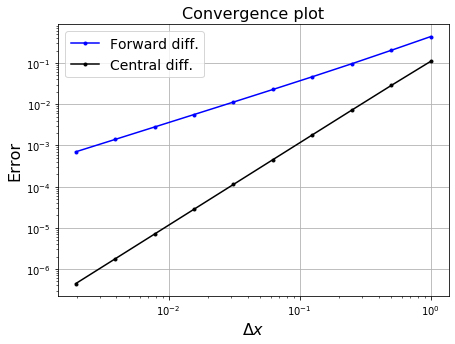

In [5]:
import math

def forward_diff(f, x, dx):
    fx = f(x)
    fxph = f(x + dx)
    return (fxph - fx) / dx


def central_diff(f, x, dx):
    fxph = f(x + dx)
    fxnh = f(x - dx)
    return (fxph - fxnh) / (2 * dx)


# for this example we know trivially what the exact solution should be
exact = np.cos(0.8)

print('Exact derivative at sin(0.8) = ', exact)
# headers for the following errors outputs
print('%20s%40s' % ('Forward differencing', 'Central differencing'))

# we're going to store all the values for plotting, initialise variable for these
fd_errors = []
cd_errors = []
dx_all = []
dx = 1.0  # an initial mesh spacing
for i in range(10):
    fd = forward_diff(np.sin, 0.8, dx)
    cd = central_diff(np.sin, 0.8, dx)
    print('%10g (error=%10.2g)         %10g (error=%10.2g)' %
          (fd, abs(fd - exact), cd, abs(cd - exact)))
    # store the h and the errors
    dx_all.append(dx)
    fd_errors.append(abs(fd - exact))
    cd_errors.append(abs(cd - exact))
    dx = dx / 2  # halve h for the next iteration

# as we expect a polynomial relationship between dx and the errors,
# a log-log plot will demonstrate this if we get straight lines
# the slopes of these lines indicating the order of the relationship:
# slope 1 for forward diff and slope 2 for central diff

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.loglog(dx_all, fd_errors, 'b.-', label='Forward diff.')
ax1.loglog(dx_all, cd_errors, 'k.-', label='Central diff.')
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('Error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

## <span style="color:blue">Exercise 4: Compute second derivative</span>

Calculate the second derivative $f''$ at $x = 1$ using the data below:

$f(0.84) = 0.431711$

$f(0.92) = 0.398519$

$f(1.00) = 0.367879$

$f(1.08) = 0.339596$

$f(1.16) = 0.313486$

You should get 0.36828

In [6]:
dx = 0.08
ddf = (0.339596 - 2*0.367879 + 0.398519)/(dx*dx)
print(ddf)

0.36828124999999967


## <span style="color:blue">Exercise 5: Implementing Forward Euler's method</span>

Write a function *euler*( *f*, *u0*, *t0*, *t_max*, *h*) that takes as arguments the function $f(u,t)$ on the RHS of our ODE,
an initial value for $u$, the start and end time of the integration, and the time step.

Use it to integrate the following ODE problems up to time $t=10$

$$u'(t)=u(t),\quad u(0)=1$$

and 

$$u'(t)=\cos(t),\quad u(0)=0$$

and plot the results. A template to get you started is below.

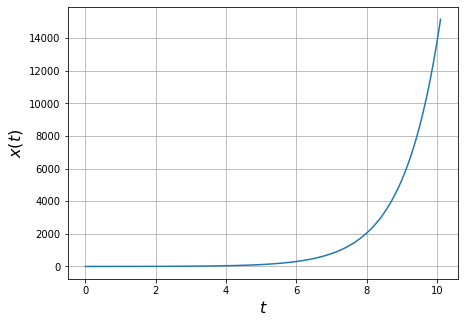

In [7]:
def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[u0]; t_all=[t0]
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

(u_all,t_all) = euler(f,1.0,0.0,10.0,0.1)



# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.plot(t_all, u_all)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$x(t)$', fontsize=16)
ax1.grid(True)

## <span style="color:blue">Exercise 6: Implementing Heun's method</span>

Repeat the previous exercise for this method.

For some ODEs you know the exact solution to compare the errors between Euler's and Heun's method, and how they vary with time step.

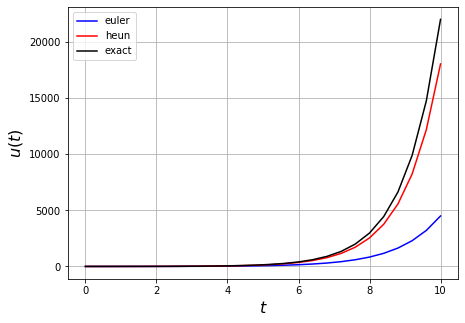

In [8]:
def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        u = u + dt*f(u,t)
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def heun(f,u0,t0,t_max,dt):
    u=u0; t=t0; u_all=[u0]; t_all=[t0];
    while t<t_max:
        ue = u + dt*f(u,t) # euler guess
        u = u + 0.5*dt*(f(u,t) + f(ue,t+dt))
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return(u_all,t_all)

def f(u,t):
    val = u
    return val

dt = 0.4
u0 = 1.0
t0 = 0.0
tf = 10.0

# set up figure
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

(u_all,t_all) = euler(f,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'b',label='euler')

(u_all,t_all) = heun(f,u0,t0,tf,dt)
ax1.plot(t_all, u_all,'r',label='heun')

# exact solution
ax1.plot(t_all, np.exp(t_all),'k',label='exact')

ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$u(t)$', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best')